# Setting up and importing libs

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install shap

In [3]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 16.6 MB/s eta 0:00:00


In [4]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.8 MB/s eta 0:00:00


In [5]:
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode
import plotly.graph_objects as go
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', 5000)
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import scipy
import scipy.stats as stats
import shap

import optuna
from optuna.samplers import TPESampler

In [6]:
np.random.seed(42)

In [7]:
test_data = pd.read_csv('/content/drive/MyDrive/Data Science/Kaggle Competitions/Classification/Introvert Prediction/test.csv')
train_data = pd.read_csv('/content/drive/MyDrive/Data Science/Kaggle Competitions/Classification/Introvert Prediction/train.csv')
original_data = pd.read_csv('/content/drive/MyDrive/Data Science/Kaggle Competitions/Classification/Introvert Prediction/personality_datasert.csv')

In [8]:
train_data

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...,...
18519,18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert
18521,18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert
18522,18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0,Introvert


In [9]:
# original_data

#Preprocess data

##Concatenating original data

In [10]:
# train_data = pd.concat([train_data.drop(['id'], axis=1), original_data],ignore_index=True)
# train_data
train_data =train_data.drop(['id'], axis=1)
train_data

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...
18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert
18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert
18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0,Introvert


##Handle Missing Data

In [11]:
train_data['Stage_fear'].unique()

array(['No', 'Yes', nan], dtype=object)

In [12]:
train_data.isna().sum()

,0
Time_spent_Alone,1190
Stage_fear,1893
Social_event_attendance,1180
Going_outside,1466
Drained_after_socializing,1149
Friends_circle_size,1054
Post_frequency,1264
Personality,0


In [13]:
# train_data.dropna(inplace =True)
# train_data

##Duplicate

In [14]:
train_data.duplicated().sum()

np.int64(0)

In [15]:
train_data.drop_duplicates(inplace = True)
train_data

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...
18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert
18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert
18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0,Introvert


In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           17334 non-null  float64
 1   Stage_fear                 16631 non-null  object 
 2   Social_event_attendance    17344 non-null  float64
 3   Going_outside              17058 non-null  float64
 4   Drained_after_socializing  17375 non-null  object 
 5   Friends_circle_size        17470 non-null  float64
 6   Post_frequency             17260 non-null  float64
 7   Personality                18524 non-null  object 
dtypes: float64(5), object(3)
memory usage: 1.1+ MB


#EDA

##Distribution of Target

<Axes: xlabel='Personality', ylabel='count'>

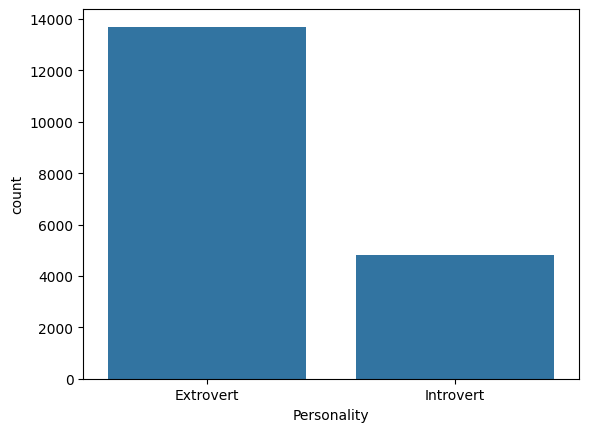

In [17]:
sns.countplot(data= train_data, x = 'Personality')

Huge Imbalance (stratification might be needed)

##Heatmap

In [18]:
Categorical_cols = ['Stage_fear','Drained_after_socializing']
num_cols = train_data.columns
num_cols = num_cols.drop(Categorical_cols)
num_cols

Index(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Friends_circle_size', 'Post_frequency', 'Personality'],
      dtype='object')

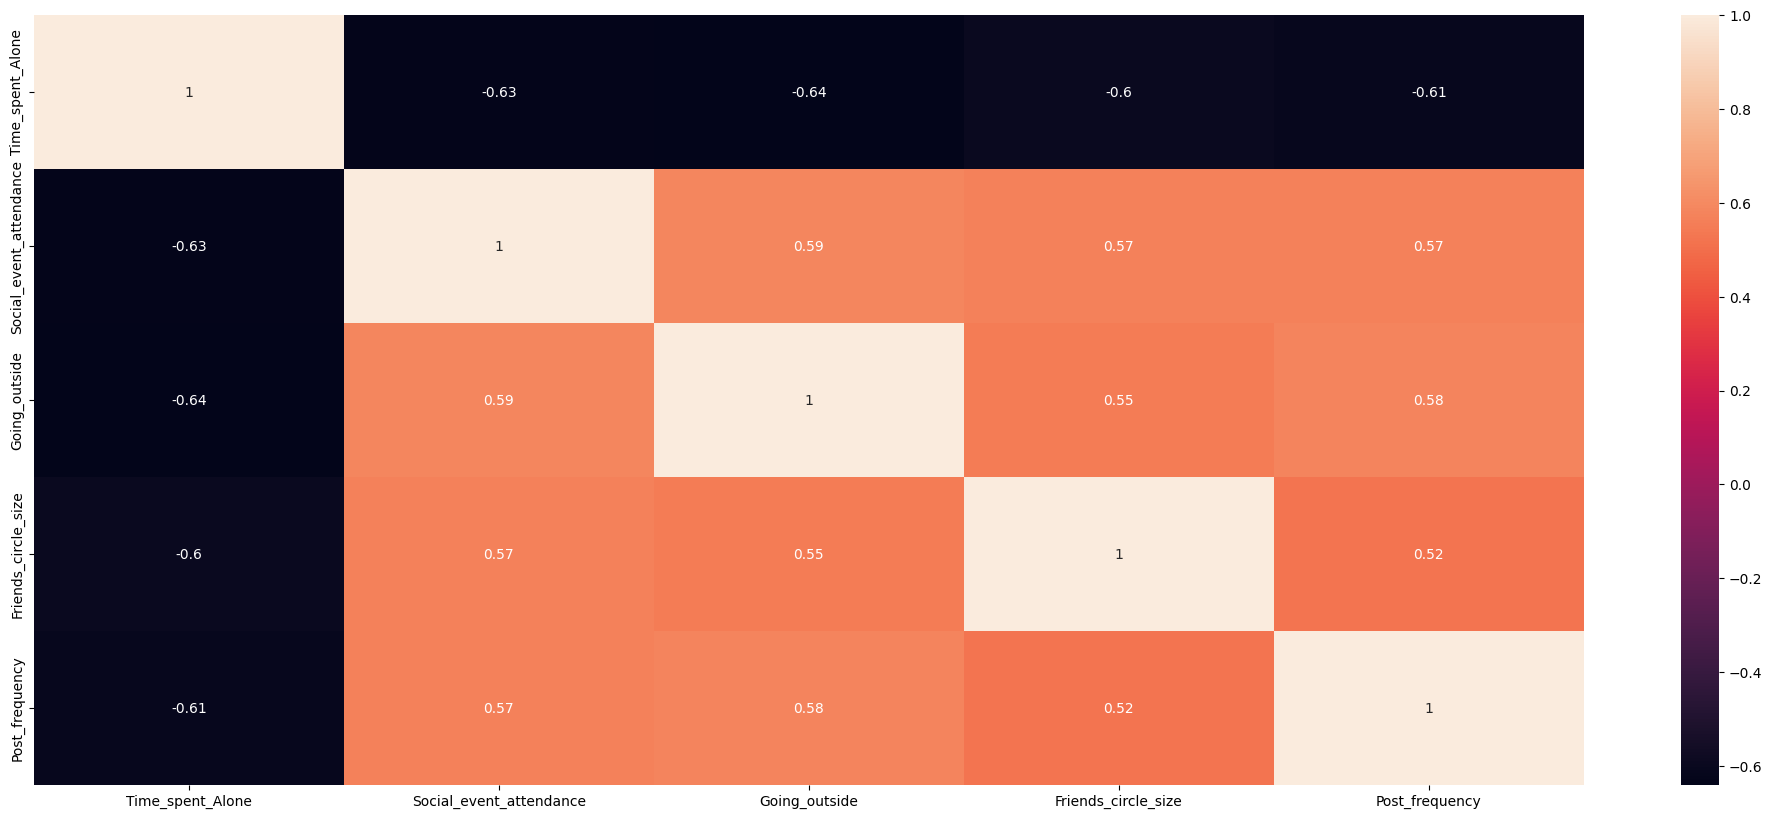

In [19]:
plt.figure(figsize=(25,10))
sns.heatmap((train_data[num_cols].drop(columns='Personality')).corr(),annot=True)
plt.show()

##Mutual Info

In [20]:
# from sklearn.feature_selection import mutual_info_classif

# y_sampled = train_data.Personality
# mutual_df = train_data[num_cols].drop(['Personality'], axis=1)

# mutual_info = mutual_info_classif(mutual_df, y_sampled, random_state=42)

# mutual_info = pd.Series(mutual_info)
# mutual_info.index = mutual_df.columns
# mutual_info = pd.DataFrame(mutual_info.sort_values(ascending=False), columns = ["Numerical_Feature_MI"] )
# mutual_info.style.background_gradient("cool")

##Distributions

###Numerical

Text(0.5, 0.98, 'Visualizing Continuous Columns')

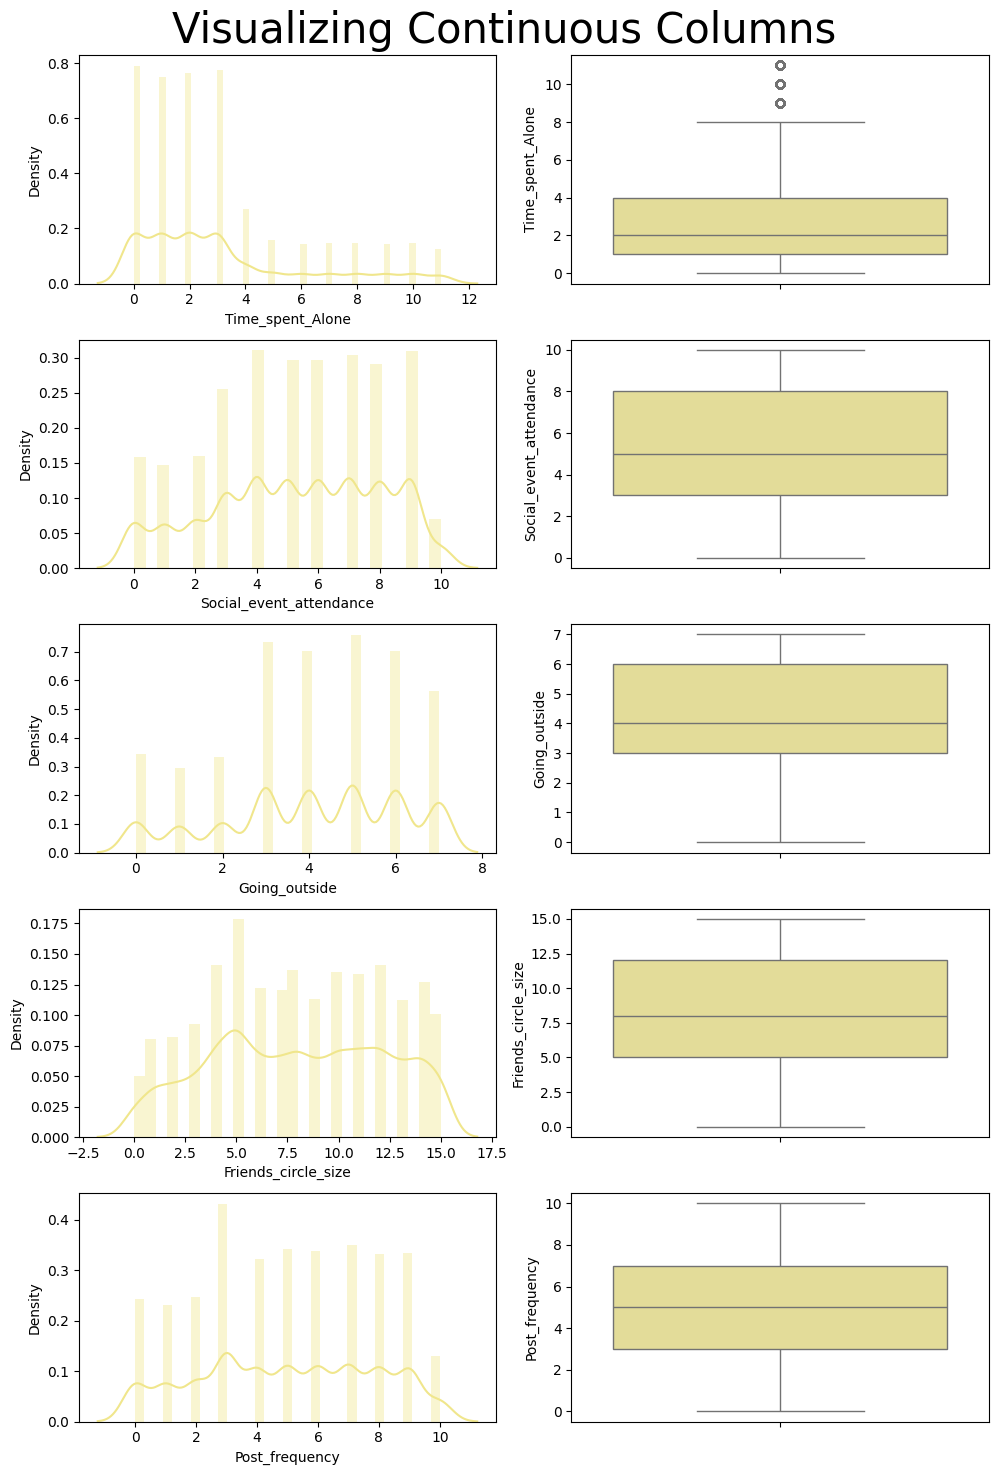

In [21]:
fig, ax = plt.subplots(5,2,figsize=(10,15))
for index,i in enumerate(num_cols.drop("Personality")):
    sns.distplot(train_data[i],ax=ax[index,0], color = 'khaki')
    sns.boxplot(train_data[i],ax=ax[index,1], color = 'khaki')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Continuous Columns",fontsize=30)

###Categorical

<Axes: xlabel='Stage_fear', ylabel='count'>

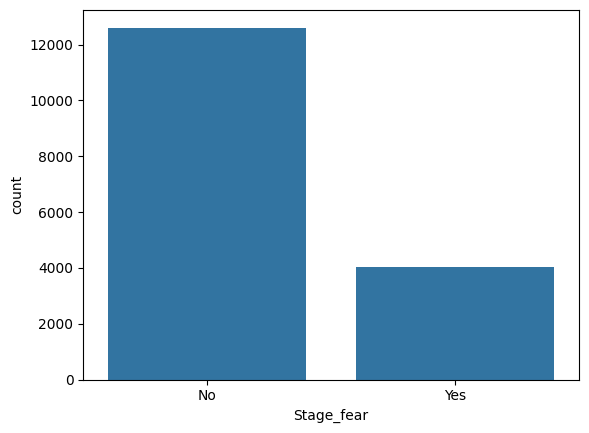

In [22]:
sns.countplot(data= train_data, x = 'Stage_fear')

<Axes: xlabel='Drained_after_socializing', ylabel='count'>

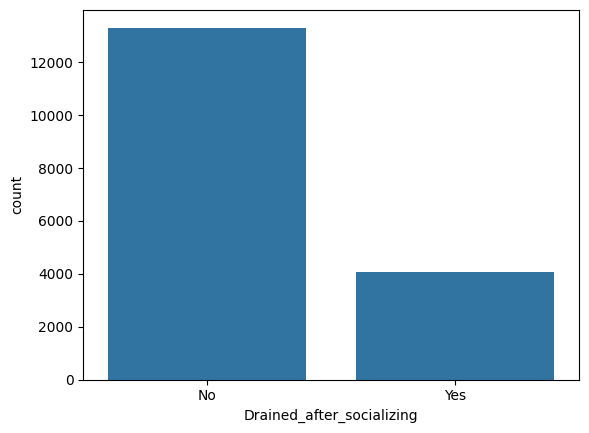

In [23]:
sns.countplot(data= train_data, x = 'Drained_after_socializing')

##Label Encoding/ One hot enccoding

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in Categorical_cols:
  train_data[i] = label_encoder.fit_transform(train_data[i])
  test_data[i] = label_encoder.fit_transform(test_data[i])
train_data[Categorical_cols]

,Stage_fear,Drained_after_socializing
0,0,0
1,0,0
2,1,2
3,0,0
4,0,0
...,...,...
18519,0,0
18520,2,0
18521,1,1
18522,1,1


In [25]:
# import pandas as pd

# # Assuming 'Categorical_cols' is a list of categorical column names in your dataset
# # For One-Hot Encoding, we'll use pd.get_dummies

# # Apply One-Hot Encoding to both train_data and test_data
# train_data = pd.get_dummies(train_data, columns=Categorical_cols, drop_first=False)
# test_data = pd.get_dummies(test_data, columns=Categorical_cols, drop_first=False)

# # Check the resulting one-hot encoded columns
# train_data

##Feature Engineering

In [26]:
train_data['Social_activity'] = train_data['Social_event_attendance'] + train_data['Going_outside']
train_data['Posts_per_friend'] = train_data['Post_frequency'] / (train_data['Friends_circle_size'] + 1)
train_data['Alone_x_Drained'] = train_data['Time_spent_Alone'] * train_data['Drained_after_socializing']
train_data['Fear_x_Events'] = train_data['Stage_fear'] * train_data['Social_event_attendance']
train_data

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Social_activity,Posts_per_friend,Alone_x_Drained,Fear_x_Events
0,0.0,0,6.0,4.0,0,15.0,5.0,Extrovert,10.0,0.312500,0.0,0.0
1,1.0,0,7.0,3.0,0,10.0,8.0,Extrovert,10.0,0.727273,0.0,0.0
2,6.0,1,1.0,0.0,2,3.0,0.0,Introvert,1.0,0.000000,12.0,1.0
3,3.0,0,7.0,3.0,0,11.0,5.0,Extrovert,10.0,0.416667,0.0,0.0
4,1.0,0,4.0,4.0,0,13.0,NaN,Extrovert,8.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18519,3.0,0,7.0,3.0,0,9.0,7.0,Extrovert,10.0,0.700000,0.0,0.0
18520,1.0,2,6.0,7.0,0,6.0,5.0,Extrovert,13.0,0.714286,0.0,12.0
18521,7.0,1,1.0,1.0,1,1.0,NaN,Introvert,2.0,NaN,7.0,1.0
18522,NaN,1,1.0,0.0,1,5.0,2.0,Introvert,1.0,0.333333,NaN,1.0


In [27]:
test_data['Social_activity'] = test_data['Social_event_attendance'] + test_data['Going_outside']
test_data['Posts_per_friend'] = test_data['Post_frequency'] / (test_data['Friends_circle_size'] + 1)
test_data['Alone_x_Drained'] = test_data['Time_spent_Alone'] * test_data['Drained_after_socializing']
test_data['Fear_x_Events'] = test_data['Stage_fear'] * test_data['Social_event_attendance']
test_data

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Social_activity,Posts_per_friend,Alone_x_Drained,Fear_x_Events
0,18524,3.0,0,7.0,4.0,0,6.0,NaN,11.0,NaN,0.0,0.0
1,18525,NaN,1,0.0,0.0,1,5.0,1.0,0.0,0.166667,NaN,0.0
2,18526,3.0,0,5.0,6.0,0,15.0,9.0,11.0,0.562500,0.0,0.0
3,18527,3.0,0,4.0,4.0,0,5.0,6.0,8.0,1.000000,0.0,0.0
4,18528,9.0,1,1.0,2.0,1,1.0,1.0,3.0,0.500000,9.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6170,24694,3.0,0,5.0,5.0,0,9.0,6.0,10.0,0.600000,0.0,0.0
6171,24695,8.0,1,2.0,1.0,1,0.0,0.0,3.0,0.000000,8.0,2.0
6172,24696,2.0,0,4.0,3.0,0,9.0,7.0,7.0,0.700000,0.0,0.0
6173,24697,3.0,0,4.0,4.0,0,11.0,9.0,8.0,0.750000,0.0,0.0


#Modeling

##Finding the baseline model

In [28]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

rfc = RandomForestClassifier()
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
lsvc = LinearSVC()
knn = KNeighborsClassifier()
gbc = GradientBoostingClassifier()
nb = GaussianNB()
base_xgb = XGBClassifier()
lgbm = LGBMClassifier()
cb = CatBoostClassifier()

In [29]:
cv = StratifiedKFold(n_splits= 5, shuffle=True, random_state=42)


In [30]:
X = train_data.drop(columns='Personality')
X

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Social_activity,Posts_per_friend,Alone_x_Drained,Fear_x_Events
0,0.0,0,6.0,4.0,0,15.0,5.0,10.0,0.312500,0.0,0.0
1,1.0,0,7.0,3.0,0,10.0,8.0,10.0,0.727273,0.0,0.0
2,6.0,1,1.0,0.0,2,3.0,0.0,1.0,0.000000,12.0,1.0
3,3.0,0,7.0,3.0,0,11.0,5.0,10.0,0.416667,0.0,0.0
4,1.0,0,4.0,4.0,0,13.0,NaN,8.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
18519,3.0,0,7.0,3.0,0,9.0,7.0,10.0,0.700000,0.0,0.0
18520,1.0,2,6.0,7.0,0,6.0,5.0,13.0,0.714286,0.0,12.0
18521,7.0,1,1.0,1.0,1,1.0,NaN,2.0,NaN,7.0,1.0
18522,NaN,1,1.0,0.0,1,5.0,2.0,1.0,0.333333,NaN,1.0


In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_data['Personality'] = label_encoder.fit_transform(train_data['Personality'])
Y = train_data['Personality']
Y

,Personality
0,0
1,0
2,1
3,0
4,0
...,...
18519,0
18520,0
18521,1
18522,1


In [32]:
from statistics import mean, stdev
from sklearn.metrics import roc_auc_score

def compute(model):
    lst_accu_stratified = []

    for train_index, test_index in cv.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
        model.fit(X_train, Y_train)
        y_pred_proba = model.predict_proba(X_test)
        auc_score = roc_auc_score(Y_test, y_pred_proba[:, 1])
        lst_accu_stratified.append(auc_score)

    max_val_score = max(lst_accu_stratified)
    min_val_score = min(lst_accu_stratified)
    mean_val_score = mean(lst_accu_stratified)
    std = stdev(lst_accu_stratified)

    hashmap[str(model)]=([mean_val_score, max_val_score, min_val_score, std])

In [33]:
model_names = [base_xgb, lgbm, cb]

hashmap = {}
for i in model_names:
  compute(i)

Streaming output truncated to the last 5000 lines.
4:	learn: 0.4738092	total: 67.4ms	remaining: 13.4s
5:	learn: 0.4413407	total: 71.7ms	remaining: 11.9s
6:	learn: 0.4124529	total: 75.7ms	remaining: 10.7s
7:	learn: 0.3869495	total: 79.8ms	remaining: 9.89s
8:	learn: 0.3635079	total: 84.1ms	remaining: 9.26s
9:	learn: 0.3420318	total: 88.6ms	remaining: 8.77s
10:	learn: 0.3229703	total: 92.3ms	remaining: 8.29s
11:	learn: 0.3055141	total: 96.4ms	remaining: 7.94s
12:	learn: 0.2899996	total: 101ms	remaining: 7.64s
13:	learn: 0.2763438	total: 104ms	remaining: 7.32s
14:	learn: 0.2637130	total: 108ms	remaining: 7.08s
15:	learn: 0.2523113	total: 112ms	remaining: 6.88s
16:	learn: 0.2416355	total: 116ms	remaining: 6.68s
17:	learn: 0.2322496	total: 120ms	remaining: 6.53s
18:	learn: 0.2236632	total: 123ms	remaining: 6.38s
19:	learn: 0.2161284	total: 128ms	remaining: 6.27s
20:	learn: 0.2093151	total: 131ms	remaining: 6.1s
21:	learn: 0.2027428	total: 135ms	remaining: 6s
22:	learn: 0.1968572	total: 139ms

In [34]:
score = pd.DataFrame(hashmap)
score = score.transpose()
score.columns=['mean_val_score', 'max_val_score', 'min_val_score', 'std']
score = score.sort_values('mean_val_score',ascending=False)
score

,mean_val_score,max_val_score,min_val_score,std
LGBMClassifier(),0.967156,0.974467,0.961959,0.005189
<catboost.core.CatBoostClassifier object at 0x7bd18e305950>,0.966353,0.972230,0.961945,0.003951
"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n feature_weights=None, gamma=None, grow_policy=None,\n importance_type=None, interaction_constraints=None,\n learning_rate=None, max_bin=None, max_cat_threshold=None,\n max_cat_to_onehot=None, max_delta_step=None, max_depth=None,\n max_leaves=None, min_child_weight=None, missing=nan,\n monotone_constraints=None, multi_strategy=None, n_estimators=None,\n n_jobs=None, num_parallel_tree=None, ...)",0.964551,0.970589,0.959361,0.004437


##Feature importancce

In [ ]:
from matplotlib import pyplot

def checking_feature_imp(model):
  for i,v in enumerate (model.feature_importances_):
    print(f'{X.columns[i]}: {v: 5f}')
  pyplot.bar([x for x in range(1, len(model.feature_importances_)+1)], model.feature_importances_)
  pyplot.show()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state=42)
def checking_shap_values(model):
  explainer = shap.Explainer(model, X_train)

  # Get SHAP values for the test set
  shap_values = explainer(X_test)

  # Plot summary plot
  shap.summary_plot(shap_values, X_test)

In [ ]:
well_performed_clf = [lgbm, base_xgb, cb]
for each_clf in well_performed_clf:
  print(each_clf)
  #checking_feature_imp(each_clf)
  checking_shap_values(each_clf)
  print()

#Tuning baseline model with Optuna

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state=42)

###LGBM

In [39]:
from lightgbm import log_evaluation, early_stopping
def objective(trial):
    param = {
        'objective': 'multiclass',
        'metric': 'multi_logloss',
        'num_class': 3,
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 20, 300),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 400)
    }

    model = LGBMClassifier(**param)

    lst_accu_stratified = []

    for train_index, test_index in cv.split(X, Y):
        X_train, X_val = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_val = Y.iloc[train_index], Y.iloc[test_index]
        model.fit(X_train, Y_train, eval_set=[(X_val, Y_val)],  callbacks=[early_stopping(stopping_rounds=50, verbose=False)])
        y_pred_proba = model.predict_proba(X_test)
        auc_score = roc_auc_score(Y_test, y_pred_proba[:, 1])
        lst_accu_stratified.append(auc_score)

    mean_val_score = mean(lst_accu_stratified)
    std_auc = stdev(lst_accu_stratified)

    trial.set_user_attr("std_auc", std_auc)
    trial.set_user_attr("all_auc_scores", lst_accu_stratified)
    # model.fit(X_train, Y_train)
    # y_pred = model.predict(X_test)
    # mean_val_score = accuracy_score(Y_test, y_pred)

    return mean_val_score

In [ ]:
# Create a study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500)

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)
print('Best accuracy: ', study.best_value)

[I 2025-08-02 20:57:16,177] A new study created in memory with name: no-name-691aa841-8d05-4167-b2f6-3c2824674bd6


In [38]:
# Sort all completed trials by objective value (mean AUC), descending
sorted_trials = sorted(
    [t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE],
    key=lambda t: t.value,
    reverse=True
)

# Print top 10 trials
for i, t in enumerate(sorted_trials[:10]):
    std_auc = t.user_attrs.get('std_auc', None)
    auc_scores = t.user_attrs.get('all_auc_scores', None)

    print(f"Trial {t.number}:")
    print(f"  Mean AUC: {t.value:.5f}")
    if std_auc is not None:
        print(f"  Std AUC: {std_auc:.5f}")
    if auc_scores is not None:
        print(f"  Fold AUCs: {auc_scores}")
    print()

Trial 7:
  Mean AUC: 0.00287
  Std AUC: 0.00287
  Fold AUCs: [np.float64(0.9777811723845681), np.float64(0.9734507561607286), np.float64(0.9758677242395195), np.float64(0.9811678959647939), np.float64(0.9782585087991104)]

Trial 26:
  Mean AUC: 0.00265
  Std AUC: 0.00265
  Fold AUCs: [np.float64(0.9853461581899634), np.float64(0.9799961533152437), np.float64(0.9823704072659387), np.float64(0.9865650794386253), np.float64(0.9850184418851361)]

Trial 5:
  Mean AUC: 0.00203
  Std AUC: 0.00203
  Fold AUCs: [np.float64(0.9772908045411152), np.float64(0.9730231322342531), np.float64(0.9729545965710932), np.float64(0.9767958515652677), np.float64(0.9750001689259302)]

Trial 58:
  Mean AUC: 0.00203
  Std AUC: 0.00203
  Fold AUCs: [np.float64(0.9756840776209822), np.float64(0.9711758065247882), np.float64(0.9720563932672881), np.float64(0.9754350325351343), np.float64(0.9728365897426244)]

Trial 235:
  Mean AUC: 0.00199
  Std AUC: 0.00199
  Fold AUCs: [np.float64(0.9760668155145436), np.float64

In [ ]:
# Best accuracy:  0.9907414699573065
best_params_lgbm = {'lambda_l1': 0.0003927381510937584, 'lambda_l2': 0.1785698376499043, 'num_leaves': 254, 'feature_fraction': 0.7235495845883843, 'bagging_fraction': 0.9051408899255103, 'bagging_freq': 2, 'min_child_samples': 7, 'learning_rate': 0.015369118845775537, 'n_estimators': 277}
optimized_lgbm = LGBMClassifier(**best_params_lgbm)

100%|===================| 5241/5242 [10:03<00:00]       

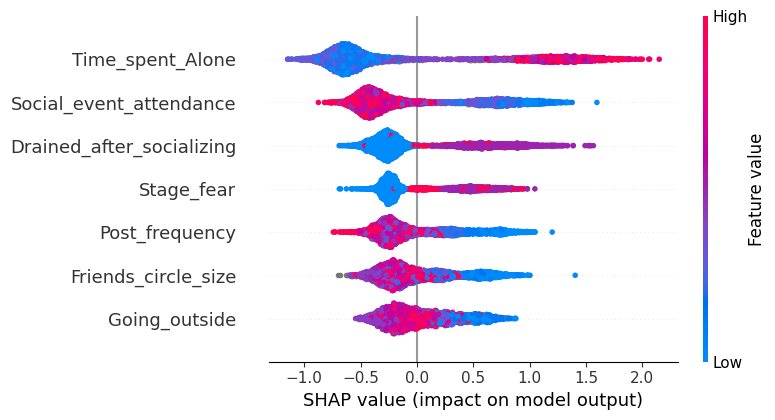

In [ ]:
#SHAP here
optimized_lgbm.fit(X,Y)
checking_shap_values(optimized_lgbm)

###GBC (omitted Due to null values)

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import accuracy_score
# from statistics import mean

# def objective(trial):
#     # Define hyperparameter search space for GradientBoostingClassifier
#     param = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 500),
#         'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
#         'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
#     }

#     model = GradientBoostingClassifier(**param)

#     lst_accu_stratified = []

#     for train_index, test_index in cv.split(X, Y):
#         X_train, X_val = X.iloc[train_index], X.iloc[test_index]
#         Y_train, Y_val = Y.iloc[train_index], Y.iloc[test_index]
#         model.fit(X_train, Y_train)
#         y_pred = model.predict(X_val)
#         acc = accuracy_score(Y_val, y_pred)
#         lst_accu_stratified.append(acc)

#     mean_val_score = mean(lst_accu_stratified)
#     return mean_val_score

In [ ]:
# # Create a study and optimize the objective function
# study = optuna.create_study(direction='maximize')  # Maximize accuracy
# study.optimize(objective, n_trials=200)

# # Print the best hyperparameters
# print('Best hyperparameters:', study.best_params)
# print('Best accuracy: ', study.best_value)

In [ ]:
# # Best accuracy: 0.9572548072268432
# best_param_gbc ={'n_estimators': 325, 'learning_rate': 0.014237987025851464, 'max_depth': 3, 'min_samples_split': 15, 'min_samples_leaf': 18, 'subsample': 0.7734932664093696, 'max_features': None}
# optimized_gbc = GradientBoostingClassifier(**best_param_gbc)

###CatBoost

In [ ]:
def objective(trial):
    # Define the hyperparameter search space for CatBoost
    param = {
        'objective': 'Logloss',  # For binary classification
        'eval_metric': 'AUC',  # AUC is suitable for binary classification
        'iterations': trial.suggest_int('iterations', 100, 500),
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-1),
        'random_strength': trial.suggest_float('random_strength', 1e-8, 10.0),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-8, 10.0),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 0.1, 10.0),
        'verbose': 0  # Suppress output
    }

    model = CatBoostClassifier(**param)

    lst_accu_stratified = []

    for train_index, test_index in cv.split(X, Y):
        X_train, X_val = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_val = Y.iloc[train_index], Y.iloc[test_index]
        model.fit(X_train, Y_train, eval_set=(X_val, Y_val), verbose=False)
        y_pred_proba = model.predict_proba(X_test)
        auc_score = roc_auc_score(Y_test, y_pred_proba[:, 1])
        lst_accu_stratified.append(auc_score)

    mean_val_score = mean(lst_accu_stratified)

    return mean_val_score

In [ ]:
# Create a study and optimize the objective function
study = optuna.create_study(direction='maximize')  # Maximize accuracy
study.optimize(objective, n_trials=200)

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)
print('Best accuracy: ', study.best_value)

[I 2025-08-01 03:52:43,456] A new study created in memory with name: no-name-092a0f69-6314-4f3a-9664-ca3fbd17e636
[I 2025-08-01 03:52:55,626] Trial 0 finished with value: 0.9710830715358112 and parameters: {'iterations': 464, 'depth': 4, 'learning_rate': 0.022800396444658127, 'random_strength': 4.31893658290591, 'bagging_temperature': 0.2936775647242579, 'l2_leaf_reg': 2.417856941363268, 'border_count': 118, 'scale_pos_weight': 8.070279975831982}. Best is trial 0 with value: 0.9710830715358112.
[I 2025-08-01 03:53:09,289] Trial 1 finished with value: 0.9688285754164895 and parameters: {'iterations': 480, 'depth': 5, 'learning_rate': 0.09423808167915775, 'random_strength': 0.08217173852063389, 'bagging_temperature': 0.10772912178637106, 'l2_leaf_reg': 2.036222311284268, 'border_count': 131, 'scale_pos_weight': 3.8242217449820703}. Best is trial 0 with value: 0.9710830715358112.
[I 2025-08-01 03:53:22,121] Trial 2 finished with value: 0.971984898911443 and parameters: {'iterations': 458,

Best hyperparameters: {'iterations': 358, 'depth': 10, 'learning_rate': 0.0468502627406365, 'random_strength': 9.51614016232296, 'bagging_temperature': 0.6938742254370053, 'l2_leaf_reg': 1.5932884526274442, 'border_count': 186, 'scale_pos_weight': 9.274588216663078}
Best accuracy:  0.9795133314240917


In [ ]:
#Best accuracy:  0.9815228624449285
best_param_cat = {'iterations': 461, 'depth': 10, 'learning_rate': 0.013931709369260373, 'random_strength': 0.025401364884585595, 'bagging_temperature': 0.9732015519892825, 'l2_leaf_reg': 0.6664919879372809, 'border_count': 88, 'scale_pos_weight': 1.2899699598750656}
optimized_cat = CatBoostClassifier(**best_param_cat)

In [ ]:
#Best accuracy:  0.9795133314240917 (feature engineering)
best_param_cat = {'iterations': 358, 'depth': 10, 'learning_rate': 0.0468502627406365, 'random_strength': 9.51614016232296, 'bagging_temperature': 0.6938742254370053, 'l2_leaf_reg': 1.5932884526274442, 'border_count': 186, 'scale_pos_weight': 9.274588216663078}
optimized_cat = CatBoostClassifier(**best_param_cat)

In [ ]:
#SHAP
optimized_cat.fit(X,Y)
checking_shap_values(optimized_cat)

###XGB

In [ ]:
def objective(trial):
    param = {
        'objective': 'multi:softmax',  # For multi-class classification
        'eval_metric': 'mlogloss',     # Metric for evaluation in multi-class classification
        'num_class': 3,      # Replace with the number of classes in your dataset
        'lambda': trial.suggest_float('lambda', 1e-8, 10.0),
        'alpha': trial.suggest_float('alpha', 1e-8, 10.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 1e-8, 10.0)
    }

    model = XGBClassifier(**param)
    lst_accu_stratified = []

    for train_index, test_index in cv.split(X, Y):
        X_train, X_val = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_val = Y.iloc[train_index], Y.iloc[test_index]
        model.fit(X_train, Y_train, eval_set=[(X_val, Y_val)], verbose=False)
        y_pred_proba = model.predict_proba(X_val)
        auc_score = roc_auc_score(Y_val, y_pred_proba[:, 1])
        lst_accu_stratified.append(auc_score)

    mean_val_score = mean(lst_accu_stratified)

    return mean_val_score


In [ ]:
# Create a study and optimize the objective function
study = optuna.create_study(direction='maximize')  # Maximize accuracy
study.optimize(objective, n_trials=200)

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)
print('Best accuracy: ', study.best_value)

In [ ]:
#Best accuracy:  0.9705802978238501
best_param_xgb = {'lambda': 0.20363056689651593, 'alpha': 0.15820200768700432, 'colsample_bytree': 0.9925033862755466, 'subsample': 0.8916137078265595, 'learning_rate': 0.08604168045253784, 'n_estimators': 289, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 3.418561767532373}
optimized_xgb = XGBClassifier(**best_param_xgb)

In [ ]:
#SHAP here
optimized_xgb.fit(X,Y)
checking_shap_values(optimized_xgb)

##Ensemble Learning

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state=42)

###Voting Method

In [ ]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier

ensemble_models = [('lgb', optimized_lgbm),
   ('xgb', optimized_xgb)]

voting_model = VotingClassifier(estimators= ensemble_models, voting= 'soft')
voting_model.fit(X, Y)

In [ ]:
voting_model_val_preds = voting_model.predict(X_test)
voting_model_val_accuracy = accuracy_score(Y_test, voting_model_val_preds)
print(voting_model_val_accuracy)

####Weight tuning with Voting Classifier and Optuna (using already tuned isolated models)

In [ ]:
def objective(trial):
    w_lgbm = trial.suggest_float("w_lgbm", 0.1, 10.0)
    w_xgb = trial.suggest_float("w_xgb", 0.1, 10.0)

    voting_clf = VotingClassifier(
        estimators=ensemble_models,
        voting='soft',
        weights=[w_lgbm, w_xgb]
    )

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = []
    for train_idx, val_idx in skf.split(X, Y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        Y_train, Y_val = Y.iloc[train_idx], Y.iloc[val_idx]

        voting_clf.fit(X_train, Y_train)
        preds = voting_clf.predict(X_val)
        scores.append(accuracy_score(Y_val, preds))
    return sum(scores) / len(scores)

In [ ]:
# Create a study and optimize the objective function
study = optuna.create_study(direction='maximize')  # Maximize accuracy
study.optimize(objective, n_trials=200)

# Print the best weight
print('Best weight:', study.best_params)
print('Best accuracy: ', study.best_value)

In [ ]:
# Best weight: {'w_lgbm': 1.596707658175287, 'w_xgb': 8.599014298260096}
# Best accuracy:  0.9639927162479054
ensemble_models = [('lgb', optimized_lgbm),
   ('xgb', optimized_xgb)]

voting_model = VotingClassifier(estimators= ensemble_models, voting='soft', weights=[1.596707658175287, 8.599014298260096])

#### Joint Tuning with Voting Classifier

In [ ]:
from lightgbm import LGBMClassifier, log_evaluation, early_stopping
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from statistics import mean
import optuna

# Assumes you already have X, Y, and cv defined

def objective(trial):
    # LightGBM params
    lgbm_params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'lambda_l1': trial.suggest_float('lgbm_lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_float('lgbm_lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('lgbm_num_leaves', 20, 300),
        'feature_fraction': trial.suggest_float('lgbm_feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_float('lgbm_bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('lgbm_bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('lgbm_min_child_samples', 5, 100),
        'learning_rate': trial.suggest_float('lgbm_learning_rate', 1e-4, 1e-1),
        'n_estimators': trial.suggest_int('lgbm_n_estimators', 100, 400)
    }

    # XGBoost parameters
    xgb_params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'lambda': trial.suggest_float('xgb_lambda', 1e-8, 10.0),
        'alpha': trial.suggest_float('xgb_alpha', 1e-8, 10.0),
        'colsample_bytree': trial.suggest_float('xgb_colsample_bytree', 0.4, 1.0),
        'subsample': trial.suggest_float('xgb_subsample', 0.4, 1.0),
        'learning_rate': trial.suggest_float('xgb_learning_rate', 1e-4, 1e-1),
        'n_estimators': trial.suggest_int('xgb_n_estimators', 100, 500),
        'max_depth': trial.suggest_int('xgb_max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('xgb_min_child_weight', 1, 10),
        'gamma': trial.suggest_float('xgb_gamma', 1e-8, 10.0)
    }

    # CatBoost parameters
    cat_params = {
        'objective': 'Logloss',
        'eval_metric': 'AUC',
        'iterations': trial.suggest_int('cat_iterations', 100, 500),
        'depth': trial.suggest_int('cat_depth', 3, 10),
        'learning_rate': trial.suggest_float('cat_learning_rate', 1e-4, 1e-1),
        'random_strength': trial.suggest_float('cat_random_strength', 1e-8, 10.0),
        'bagging_temperature': trial.suggest_float('cat_bagging_temperature', 0.0, 1.0),
        'l2_leaf_reg': trial.suggest_float('cat_l2_leaf_reg', 1e-8, 10.0),
        'border_count': trial.suggest_int('cat_border_count', 1, 255),
        'scale_pos_weight': trial.suggest_float('cat_scale_pos_weight', 0.1, 10.0),
        'verbose': 0
    }

    # Instantiate models
    lgbm = LGBMClassifier(**lgbm_params)
    xgb = XGBClassifier(**xgb_params)
    cat = CatBoostClassifier(**cat_params)

    # Weights for ensemble
    w_lgbm = trial.suggest_float("w_lgbm", 0.1, 10.0)
    w_xgb = trial.suggest_float("w_xgb", 0.1, 10.0)
    w_cat = trial.suggest_float("w_cat", 0.1, 10.0)

    ensemble = VotingClassifier(
        estimators=[
            ('lgbm', lgbm),
            ('xgb', xgb),
            ('cat', cat)
        ],
        voting='soft',
        weights=[w_lgbm, w_xgb, w_cat]
    )

    # Cross-validation
    scores = []
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for train_idx, val_idx in skf.split(X, Y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        Y_train, Y_val = Y.iloc[train_idx], Y.iloc[val_idx]
        ensemble.fit(X_train, Y_train)
        preds = ensemble.predict_proba(X_val)
        auc = roc_auc_score(Y_val, preds[:, 1])
        scores.append(auc)

    return mean(scores)


In [ ]:
# Create a study and optimize the objective function
study = optuna.create_study(direction='maximize')  # Maximize accuracy
study.optimize(objective, n_trials=200)

# Print the best weight
print('Best weight:', study.best_params)
print('Best accuracy: ', study.best_value)

In [ ]:
# {'lgbm_lambda_l1': 4.855796308823436, 'lgbm_lambda_l2': 1.8112910186742914, 'lgbm_num_leaves': 208, 'lgbm_feature_fraction': 0.764049612955413, 'lgbm_bagging_fraction': 0.9614629909022068, 'lgbm_bagging_freq': 2, 'lgbm_min_child_samples': 32, 'lgbm_learning_rate': 0.06543470275768253, 'lgbm_n_estimators': 305, 'xgb_lambda': 8.923058045955715, 'xgb_alpha': 6.123119381649882, 'xgb_colsample_bytree': 0.4333895770236075, 'xgb_subsample': 0.47655723941392947, 'xgb_learning_rate': 0.09703258014075122, 'xgb_n_estimators': 360, 'xgb_max_depth': 6, 'xgb_min_child_weight': 3, 'xgb_gamma': 2.2365791698635755, 'cat_iterations': 385, 'cat_depth': 5, 'cat_learning_rate': 0.02915893198223019, 'cat_random_strength': 9.268489564535674, 'cat_bagging_temperature': 0.7806793560503623, 'cat_l2_leaf_reg': 5.429814350529708, 'cat_border_count': 181, 'cat_scale_pos_weight': 1.451535654181624, 'w_lgbm': 6.15513939388916, 'w_xgb': 3.0235392985276004, 'w_cat': 8.989811656281585}
# Best accuracy:  0.9706136086780992


# Updated LightGBM parameters
best_params_lgbm = {
    'lambda_l1': 4.855796308823436,
    'lambda_l2': 1.8112910186742914,
    'num_leaves': 208,
    'feature_fraction': 0.764049612955413,
    'bagging_fraction': 0.9614629909022068,
    'bagging_freq': 2,
    'min_child_samples': 32,
    'learning_rate': 0.06543470275768253,
    'n_estimators': 305,
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'verbosity': -1
}
optimized_lgbm = LGBMClassifier(**best_params_lgbm)

# Updated XGBoost parameters
best_params_xgb = {
    'lambda': 8.923058045955715,
    'alpha': 6.123119381649882,
    'colsample_bytree': 0.4333895770236075,
    'subsample': 0.47655723941392947,
    'learning_rate': 0.09703258014075122,
    'n_estimators': 360,
    'max_depth': 6,
    'min_child_weight': 3,
    'gamma': 2.2365791698635755,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'use_label_encoder': False
}
optimized_xgb = XGBClassifier(**best_params_xgb)

# Updated CatBoost parameters
best_params_cat = {
    'iterations': 385,
    'depth': 5,
    'learning_rate': 0.02915893198223019,
    'random_strength': 9.268489564535674,
    'bagging_temperature': 0.7806793560503623,
    'l2_leaf_reg': 5.429814350529708,
    'border_count': 181,
    'scale_pos_weight': 1.451535654181624,
    'objective': 'Logloss',
    'eval_metric': 'AUC',
    'verbose': 0
}
optimized_cat = CatBoostClassifier(**best_params_cat)

# Updated voting weights
voting_weights = [6.15513939388916, 3.0235392985276004, 8.989811656281585]

# Voting Classifier (soft voting)
voting_model = VotingClassifier(
    estimators=[
        ('lgbm', optimized_lgbm),
        ('xgb', optimized_xgb),
        ('cat', optimized_cat)
    ],
    voting='soft',
    weights=voting_weights,
    n_jobs=-1
)
voting_model.fit(X,Y)

###Stacking Method

In [ ]:
from sklearn.ensemble import StackingClassifier
final_estimator = LogisticRegression()

estimators = [
    ('cat', optimized_cat),
    ('lgb', optimized_lgbm)
]

stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator
)

# Train the stacking model
stacking_model.fit(X, Y)

# Evaluate the model
accuracy = stacking_model.score(X_test, Y_test)
print(f'Accuracy: {accuracy}')

0:	learn: 0.6148916	total: 23.1ms	remaining: 8.25s
1:	learn: 0.5508458	total: 50.5ms	remaining: 8.99s
2:	learn: 0.4899534	total: 193ms	remaining: 22.8s
3:	learn: 0.4384435	total: 242ms	remaining: 21.4s
4:	learn: 0.3937767	total: 318ms	remaining: 22.5s
5:	learn: 0.3614255	total: 340ms	remaining: 20s
6:	learn: 0.3324920	total: 392ms	remaining: 19.7s
7:	learn: 0.3063698	total: 484ms	remaining: 21.2s
8:	learn: 0.2838139	total: 571ms	remaining: 22.1s
9:	learn: 0.2700184	total: 593ms	remaining: 20.6s
10:	learn: 0.2534697	total: 672ms	remaining: 21.2s
11:	learn: 0.2398547	total: 785ms	remaining: 22.6s
12:	learn: 0.2315790	total: 841ms	remaining: 22.3s
13:	learn: 0.2215034	total: 1.02s	remaining: 25.1s
14:	learn: 0.2132322	total: 1.21s	remaining: 27.6s
15:	learn: 0.2059062	total: 1.25s	remaining: 26.8s
16:	learn: 0.1992515	total: 1.28s	remaining: 25.7s
17:	learn: 0.1931911	total: 1.34s	remaining: 25.4s
18:	learn: 0.1890020	total: 1.36s	remaining: 24.4s
19:	learn: 0.1843540	total: 1.41s	remaini

#### Hypothesis: Cat+ LGBM or XGB has better generalization??

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier

stack_a = StackingClassifier(
    estimators=[('xgb', optimized_xgb), ('lgbm', optimized_lgbm), ('cat', optimized_cat)],
    final_estimator=LogisticRegression()
)

stack_b = StackingClassifier(
    estimators=[('lgbm', optimized_lgbm), ('cat', optimized_cat)],
    final_estimator=LogisticRegression()
)

print("Stack A score:", cross_val_score(stack_a, X, Y, cv=5).mean())


In [ ]:
print("Stack B score:", cross_val_score(stack_b, X, Y, cv=5).mean())

#####Correlation between two models (XGB vs LGBM; XGB vs CAT)

In [ ]:
import numpy as np

# Assume you have predictions
pred_xgb = optimized_xgb.predict(X_test)
pred_lgbm = optimized_lgbm.predict(X_test)
pred_cat = optimized_cat.predict(X_test)

# Correlation between predictions
print(np.corrcoef(pred_xgb, pred_lgbm)[0,1])  # High = similar models
print(np.corrcoef(pred_xgb, pred_cat)[0,1])   # Lower = more diversity

####Tuning stacking models with optuna (using already tuned isolated models)

In [ ]:
def objective(trial):
    # Hyperparameters for meta-model (LogisticRegression)
    C = trial.suggest_float("C", 1e-4, 10.0, log=True)
    penalty = trial.suggest_categorical("penalty", ["l2", None])

    meta_model = LogisticRegression(C=C, penalty=penalty, solver='lbfgs', max_iter=1000)

    stack_model = StackingClassifier(
        estimators=estimators,
        final_estimator=meta_model,
        cv=5,
        passthrough=False,
        n_jobs=-1
    )

    score = cross_val_score(stack_model, X_train, Y_train, cv=5, scoring='accuracy').mean()
    return score

# Optimize meta-model
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Best params:", study.best_params)
print('Best accuracy: ', study.best_value)

In [ ]:
C = 1.9243483755102326
penalty= None
meta_model = LogisticRegression(C=C, penalty=penalty, solver='lbfgs', max_iter=1000)
stacking_model = StackingClassifier(estimators=estimators, final_estimator= meta_model)

####Joint tuning with Stacking Classifier

In [ ]:
import optuna
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from statistics import mean
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

def objective(trial):
    # --- LightGBM Parameters ---
    lgbm_params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'lambda_l1': trial.suggest_float('lgbm_lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_float('lgbm_lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('lgbm_num_leaves', 20, 300),
        'feature_fraction': trial.suggest_float('lgbm_feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_float('lgbm_bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('lgbm_bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('lgbm_min_child_samples', 5, 100),
        'learning_rate': trial.suggest_float('lgbm_learning_rate', 1e-4, 1e-1),
        'n_estimators': trial.suggest_int('lgbm_n_estimators', 100, 400)
    }

    # --- XGBoost Parameters ---
    xgb_params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'lambda': trial.suggest_float('xgb_lambda', 1e-8, 10.0),
        'alpha': trial.suggest_float('xgb_alpha', 1e-8, 10.0),
        'colsample_bytree': trial.suggest_float('xgb_colsample_bytree', 0.4, 1.0),
        'subsample': trial.suggest_float('xgb_subsample', 0.4, 1.0),
        'learning_rate': trial.suggest_float('xgb_learning_rate', 1e-4, 1e-1),
        'n_estimators': trial.suggest_int('xgb_n_estimators', 100, 500),
        'max_depth': trial.suggest_int('xgb_max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('xgb_min_child_weight', 1, 10),
        'gamma': trial.suggest_float('xgb_gamma', 1e-8, 10.0),
        'use_label_encoder': False
    }

    # --- CatBoost Parameters ---
    cat_params = {
        'objective': 'Logloss',
        'eval_metric': 'AUC',
        'iterations': trial.suggest_int('cat_iterations', 100, 500),
        'depth': trial.suggest_int('cat_depth', 3, 10),
        'learning_rate': trial.suggest_float('cat_learning_rate', 1e-4, 1e-1),
        'random_strength': trial.suggest_float('cat_random_strength', 1e-8, 10.0),
        'bagging_temperature': trial.suggest_float('cat_bagging_temperature', 0.0, 1.0),
        'l2_leaf_reg': trial.suggest_float('cat_l2_leaf_reg', 1e-8, 10.0),
        'border_count': trial.suggest_int('cat_border_count', 1, 255),
        'scale_pos_weight': trial.suggest_float('cat_scale_pos_weight', 0.1, 10.0),
        'verbose': 0
    }

    # Instantiate base models
    lgbm = LGBMClassifier(**lgbm_params)
    xgb = XGBClassifier(**xgb_params)
    cat = CatBoostClassifier(**cat_params)

    # --- Meta-model (final estimator) parameters ---
    C = trial.suggest_float("meta_C", 1e-4, 10.0, log=True)
    penalty = trial.suggest_categorical("meta_penalty", ["l2", None])

    meta_model = LogisticRegression(C=C, penalty=penalty, solver='lbfgs', max_iter=1000)

    # --- Define Stacking Classifier ---
    stack_model = StackingClassifier(
        estimators=[
            ('lgbm', lgbm),
            ('xgb', xgb),
            ('cat', cat)
        ],
        final_estimator=meta_model,
        cv=5,
        passthrough=False,
        n_jobs=-1
    )

    # --- Cross-validation ---
    scores = []
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for train_idx, val_idx in skf.split(X, Y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        Y_train, Y_val = Y.iloc[train_idx], Y.iloc[val_idx]

        stack_model.fit(X_train, Y_train)
        preds = stack_model.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(Y_val, preds)
        scores.append(auc)

    return mean(scores)

# Run Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

print("Best trial AUC:", study.best_value)
print("Best hyperparameters:", study.best_params)

[I 2025-08-01 02:12:04,325] A new study created in memory with name: no-name-d48dd438-b599-4ef5-b50a-c372917fdd44
[W 2025-08-01 02:12:08,002] Trial 0 failed with parameters: {'lgbm_lambda_l1': 4.108907176954179, 'lgbm_lambda_l2': 7.227376182626581, 'lgbm_num_leaves': 158, 'lgbm_feature_fraction': 0.5583486952609918, 'lgbm_bagging_fraction': 0.4212197566879216, 'lgbm_bagging_freq': 5, 'lgbm_min_child_samples': 73, 'lgbm_learning_rate': 0.06261824411390171, 'lgbm_n_estimators': 212, 'xgb_lambda': 8.94262400293321, 'xgb_alpha': 3.9165253419267203, 'xgb_colsample_bytree': 0.5983759573496008, 'xgb_subsample': 0.5081472639840574, 'xgb_learning_rate': 0.0329222729909194, 'xgb_n_estimators': 141, 'xgb_max_depth': 4, 'xgb_min_child_weight': 10, 'xgb_gamma': 8.818144358244407, 'cat_iterations': 469, 'cat_depth': 7, 'cat_learning_rate': 0.07717700357137576, 'cat_random_strength': 2.4679056522063885, 'cat_bagging_temperature': 0.3622265519849095, 'cat_l2_leaf_reg': 7.480099193396852, 'cat_border_c

KeyboardInterrupt: 

In [ ]:
# {'lgbm_lambda_l1': 3.705494427598681, 'lgbm_lambda_l2': 8.447007757006228, 'lgbm_num_leaves': 142, 'lgbm_feature_fraction': 0.6894756022914302, 'lgbm_bagging_fraction': 0.9473941142597405, 'lgbm_bagging_freq': 7, 'lgbm_min_child_samples': 41, 'lgbm_learning_rate': 0.04788130878081352, 'lgbm_n_estimators': 211, 'xgb_lambda': 1.3182016190336703, 'xgb_alpha': 6.37631189727107, 'xgb_colsample_bytree': 0.9086990746953332, 'xgb_subsample': 0.43561307852724734, 'xgb_learning_rate': 0.05861461781004101, 'xgb_n_estimators': 290, 'xgb_max_depth': 8, 'xgb_min_child_weight': 2, 'xgb_gamma': 3.0917168603580096, 'cat_iterations': 407, 'cat_depth': 7, 'cat_learning_rate': 0.025082804546448952, 'cat_random_strength': 6.257049617299793, 'cat_bagging_temperature': 0.4184547890595095, 'cat_l2_leaf_reg': 2.5994547784631368, 'cat_border_count': 231, 'cat_scale_pos_weight': 1.030451497061311, 'meta_C': 0.54079511771124, 'meta_penalty': None}.
# Best is trial 129 with value: 0.9705451120262247.


best_params_lgbm = {
    'lambda_l1': 3.705494427598681,
    'lambda_l2': 8.447007757006228,
    'num_leaves': 142,
    'feature_fraction': 0.6894756022914302,
    'bagging_fraction': 0.9473941142597405,
    'bagging_freq': 7,
    'min_child_samples': 41,
    'learning_rate': 0.04788130878081352,
    'n_estimators': 211,
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'verbosity': -1
}
optimized_lgbm = LGBMClassifier(**best_params_lgbm)

# Optimized XGBoost parameters
best_params_xgb = {
    'lambda': 1.3182016190336703,
    'alpha': 6.37631189727107,
    'colsample_bytree': 0.9086990746953332,
    'subsample': 0.43561307852724734,
    'learning_rate': 0.05861461781004101,
    'n_estimators': 290,
    'max_depth': 8,
    'min_child_weight': 2,
    'gamma': 3.0917168603580096,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'use_label_encoder': False
}
optimized_xgb = XGBClassifier(**best_params_xgb)

# Optimized CatBoost parameters
best_params_cat = {
    'iterations': 407,
    'depth': 7,
    'learning_rate': 0.025082804546448952,
    'random_strength': 6.257049617299793,
    'bagging_temperature': 0.4184547890595095,
    'l2_leaf_reg': 2.5994547784631368,
    'border_count': 231,
    'scale_pos_weight': 1.030451497061311,
    'objective': 'Logloss',
    'eval_metric': 'AUC',
    'verbose': 0
}
optimized_cat = CatBoostClassifier(**best_params_cat)

# Meta-classifier: Logistic Regression
meta_model = LogisticRegression(
    C=0.54079511771124,
    penalty='l2',  # Assuming default 'l2' since 'None' was provided
    solver='lbfgs',
    max_iter=1000
)

# Stacking Classifier setup
stacking_model = StackingClassifier(
    estimators=[
        ('lgbm', optimized_lgbm),
        ('xgb', optimized_xgb),
        ('cat', optimized_cat)
    ],
    final_estimator=meta_model,
    passthrough=False,
    n_jobs=-1
)

In [ ]:
stacking_model.fit(X,Y)

#Final Solutions

In [ ]:
optimized_lgbm.fit(X, Y)

LGBMClassifier(bagging_fraction=0.9051408899255103, bagging_freq=2,
               feature_fraction=0.7235495845883843,
               lambda_l1=0.0003927381510937584, lambda_l2=0.1785698376499043,
               learning_rate=0.015369118845775537, min_child_samples=7,
               n_estimators=277, num_leaves=254)

In [ ]:
X

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Social_activity,Posts_per_friend,Alone_x_Drained,Fear_x_Events
0,0.0,0,6.0,4.0,0,15.0,5.0,10.0,0.312500,0.0,0.0
1,1.0,0,7.0,3.0,0,10.0,8.0,10.0,0.727273,0.0,0.0
2,6.0,1,1.0,0.0,2,3.0,0.0,1.0,0.000000,12.0,1.0
3,3.0,0,7.0,3.0,0,11.0,5.0,10.0,0.416667,0.0,0.0
4,1.0,0,4.0,4.0,0,13.0,NaN,8.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
18519,3.0,0,7.0,3.0,0,9.0,7.0,10.0,0.700000,0.0,0.0
18520,1.0,2,6.0,7.0,0,6.0,5.0,13.0,0.714286,0.0,12.0
18521,7.0,1,1.0,1.0,1,1.0,NaN,2.0,NaN,7.0,1.0
18522,NaN,1,1.0,0.0,1,5.0,2.0,1.0,0.333333,NaN,1.0


In [ ]:
test_data = test_data.drop(columns =['id'])
test_data

KeyError: "['id'] not found in axis"

In [ ]:
solution = optimized_lgbm.predict(test_data)
solution

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
def convert_personality(personality_value):
    personality_map = {0: "Extrovert", 1: "Introvert"}
    return personality_map.get(personality_value, "Unknown")

In [ ]:
sample = pd.read_csv('/content/drive/MyDrive/Data Science/Kaggle Competitions/Classification/Introvert Prediction/sample_submission.csv')
sample['Personality'] = solution
sample['Personality'] = sample['Personality'].apply(convert_personality)
sample

,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert
...,...,...
6170,24694,Extrovert
6171,24695,Introvert
6172,24696,Extrovert
6173,24697,Extrovert


In [ ]:
from google.colab import files

sample.to_csv('lgbm_optuna_feature_engineering2.csv', index=False)
files.download('lgbm_optuna_feature_engineering2.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>